# ADP 31회 풀이 연습

각 환자의 의료정보이다. NObeyesdad를 종속변수로 하는 분류모델을 만드려고 한다.

- id: unique id for each row
- Gender: sex - male or female
- Age: age
- Height: height
- Weight: weight
- family_history_with_overweight: Has a family member suffered or suffers f from overweight? - yes or no
- FAVC: Frequent consumption of high caloric food - yes or no
- FCVC: Frequency of consumption of vegetables - Never, Sometimes, Always
- NCP: Number of main meals - 1, 2, 3, 4
- CAEC: Consumption of food between meals - No, Sometimes, Frequently, Always
- SMOKE: Do you smoke - yes o no
- CH2O: Consumption of water daily - Less than a litter, between 1 and 2 l, more than 2 l
- SCC: Calories consumption monitoring - yes or no
- FAF: Physical activity frequency - 0, 1 to 2, 2 to 4, 4 to 5
- TUE: Time using technology devices - 0 to 2, 3 to 5, >5
- CALC: Consumption of alcohol - no, sometimes, frequently, always
- MTRANS: Transportation used - automobile, motorbike, bike, public_transportation, walking
- BMI: Body mass index

(종속변수)
NObeyesdad: Type of obesity - overweight-level_i, obesity_type_i, obesity_type_ii, obesity_type_iii

# 문항

1-1. EDA & 결측치 및 이상치를 판단하고 처리하라

1-2. 데이터 전처리 기법 2가지를 설명하고 주어진 데이터에 적용시 어떤 효과가 있는지 설명하라

1-3. 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

2-1. 앙상블을 제외한 분류 모델 3가지 구축 및 결과 비교 및 설명하라

2-2. 2-1에서 사용한 모델 중 하나를 골라 그리드 서치를 통해서 파라미터 튜닝 및 분류 모델 성능 평가 (precision ,recall)

2-3. 2-1의 3가지 모델을 soft voting을 이용하여 모델링 한 결과와 2-2과 비교하라

3-1. 하나의 모델을 선정하여 Drop Column Importance 방식으로 각 변수 별로 전체 컬럼을 포함한 모델과의 recall 값의 차이를 계산하고 시각화 하라

## 1-1. EDA & 결측치 및 이상치를 판단하고 처리하라

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

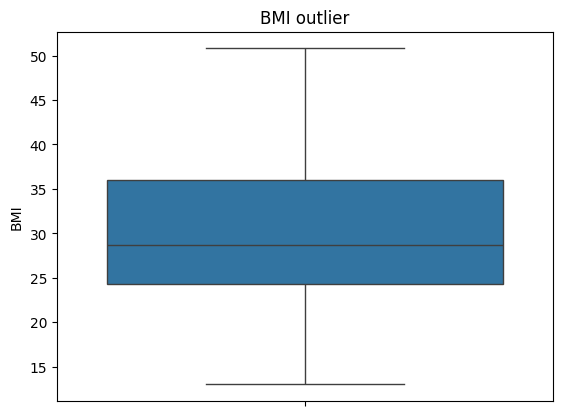

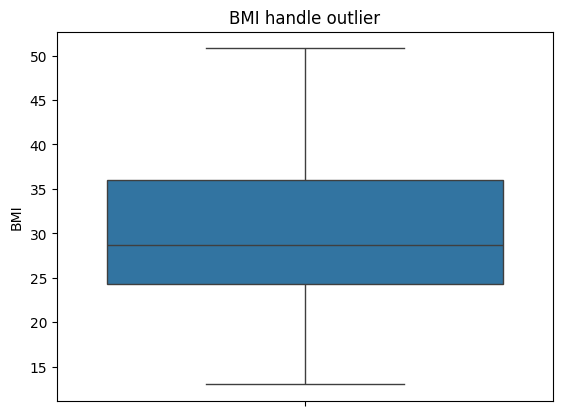

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv(r"data\ObesityDataSet_cleaned_and_data_sinthetic.csv")

print(df.info())
print(df.describe())

# 결측치 탐지
missing_values = df.isnull().sum()
print('결측치 개수:\n', missing_values)

# 이상치 탐지 (BMI 변수 예시)
sns.boxplot(df['BMI'])
plt.title('BMI outlier')
plt.show()

# 이상치 처리 (IQR방식을 이용한 Winsorization)
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['BMI'] = df['BMI'].clip(lower_bound, upper_bound)

# 처리 후 확인
sns.boxplot(df['BMI'])
plt.title('BMI handle outlier')
plt.show()

결측치, 이상치 없음

In [10]:
# object 열 확인
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Categorical columns: Index(['id', 'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')
id: 2111 unique values
Gender: 2 unique values
family_history_with_overweight: 2 unique values
FAVC: 2 unique values
FCVC: 3 unique values
CAEC: 4 unique values
SMOKE: 2 unique values
CH2O: 3 unique values
SCC: 2 unique values
FAF: 4 unique values
TUE: 3 unique values
CALC: 4 unique values
MTRANS: 5 unique values
NObeyesdad: 7 unique values


In [3]:
# FAF, TUE 데이터 내용 확인 (수치형이 아님)
print(df['FAF'].unique())
print(df['TUE'].unique())

df['FAF'] = df['FAF'].replace({'0': 0, '1 to 2': 1.5, '2 to 4': 3, '4 to 5': 4.5}).astype(float)
df['TUE'] = df['TUE'].replace({'0 to 2': 1, '3 to 5': 4, '>5': 6}).astype(float)

print(df['FAF'].unique())
print(df['TUE'].unique())

['0' '4 to 5' '2 to 4' '1 to 2']
['3 to 5' '0 to 2' '>5']
[0.  4.5 3.  1.5]
[4. 1. 6.]


C:\Users\USER\AppData\Local\Temp\ipykernel_30480\1063813728.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FAF'] = df['FAF'].replace({'0': 0, '1 to 2': 1.5, '2 to 4': 3, '4 to 5': 4.5}).astype(float)
C:\Users\USER\AppData\Local\Temp\ipykernel_30480\1063813728.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TUE'] = df['TUE'].replace({'0 to 2': 1, '3 to 5': 4, '>5': 6}).astype(float)


In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. 라벨 인코딩
label_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'CH2O', 'CALC', 'MTRANS', 'SMOKE', 'SCC']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le # 추후 디코딩 용 저장

# 결과 확인
print(df[label_cols].head())

# 2. Min-Max 스케일링
scaler = MinMaxScaler()
scale_cols = ['Age', 'Height', 'Weight', 'BMI', 'FAF', 'TUE']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# 결과 확인
print(df[scale_cols].describe())

   Gender  family_history_with_overweight  FAVC  CAEC  CH2O  CALC  MTRANS  \
0       0                               1     0     3     0     2       3   
1       0                               1     0     3     2     3       3   
2       1                               1     0     3     0     1       3   
3       1                               0     0     3     0     1       4   
4       1                               0     0     3     0     3       3   

   SMOKE  SCC  
0      0    0  
1      1    1  
2      0    0  
3      0    0  
4      0    0  
               Age       Height       Weight          BMI          FAF  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.219489     0.474863     0.355140     0.441685     0.335544   
std       0.135257     0.176047     0.195437     0.211867     0.298487   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.127660     0.339623     0.197761     0.299556     0.000000 

효과 설명

1. 라벨 인코딩 :
- 범주형 변수는 머신러닝 모델에서 직접 처리되지 않으므로 숫자로 변환이 필수적임
- 라벨 인코딩은 간단하고 빠르며, 특히 이진 변수에 적합하다. 다만, 다중 클래스의 경우 숫자 크기로 인해 의도치 않은 순서를 학습할 위험이 있어 주의해야 한다.

2. Min-Max 스케일링 :
- 변수가 서로 다른 범위를 가지는 경우, 모델 학습에서 일부 변수가 더 큰 영향을 미치게 된다.
- Min-Max 스케일링은 데이터를 동일한 범위(0~1)로 맞춰 모델의 안정성을 향상시키고, 특히 SVM, KNN과 같은 거리 기반 알고리즘에서 중요한 역할을 한다.

## 1-3. 피쳐 엔지니어링을 통해 파생변수 1개를 생성하고 그 이유를 말하라

        BMI  family_history_with_overweight       FAF       ARI
0  0.301162                             1.0  0.000000  0.451742
1  0.297240                             1.0  1.000000  0.222930
2  0.284736                             1.0  0.666667  0.256263
3  0.366359                             0.0  0.666667  0.219816
4  0.405778                             0.0  0.000000  0.405778


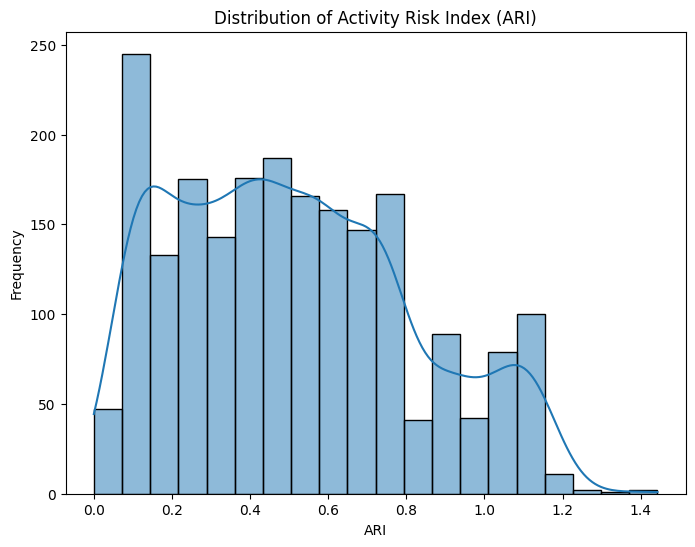

In [5]:
# 파생변수 생성
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype(float)
df['ARI'] = (df['BMI'] * (1 + 0.5 * df['family_history_with_overweight'])) / (1 + df['FAF'])

# 결과 확인
print(df[['BMI', 'family_history_with_overweight', 'FAF', 'ARI']].head())

# ARI 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['ARI'], kde=True, bins=20)
plt.title('Distribution of Activity Risk Index (ARI)')
plt.xlabel('ARI')
plt.ylabel('Frequency')
plt.show()

1. ARI 정의 및 공식
**Activity Risk Index (ARI)**는 개인의 비만 위험을 정량적으로 평가하기 위해 만들어진 파생 변수입니다. 이는 다음 세 가지 주요 요소를 기반으로 계산됩니다:

- BMI (Body Mass Index):
    - 비만의 대표적인 지표로, 체중(kg)을 키(m)의 제곱으로 나눈 값입니다.
    - BMI가 높을수록 비만 위험이 크며, ARI에서 위험의 핵심 요소로 작용합니다.

- family_history_with_overweight (가족 병력):
    - 비만 가족력이 있는 사람은 유전적, 환경적 요인으로 인해 비만 위험이 더 높습니다.
    - 이 값을 0 (병력 없음) 또는 1 (병력 있음)으로 사용하며, 가족 병력이 있을 경우 ARI에 가중치로 반영됩니다.

- FAF (Physical Activity Frequency):
    - 주간 신체 활동 빈도를 나타냅니다.
    - 활동 빈도가 높을수록 비만 위험이 낮아지며, ARI 계산식에서 이를 분모로 사용해 위험을 낮추는 역할을 합니다.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 데이터 준비
X = df.drop(['NObeyesdad', 'id'], axis=1) # 종속변수 
y = df['NObeyesdad'] # 종속변수

# 데이터 분석
X_train, X_test, y_train, t_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1.로지스틱 회귀
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# 2. 서포트 벡터 머신
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_log = log_pred.predict(X_test)

# 3. K-NearestNeighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 결과 비교
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

ValueError: could not convert string to float: 'always'

In [7]:
# object 열 확인
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

Categorical columns: Index(['id', 'FCVC', 'NObeyesdad'], dtype='object')
id: 2111 unique values
FCVC: 3 unique values
NObeyesdad: 7 unique values


In [ ]:
##### #####


from sklearn.model_selection import train_test_split